# Анализ рынка игр для маркетингово плана интернет-магазина «Стримчик»<a id='toc0_'></a>    
- [Описание](#toc1_1_)    
- [Импорт и подготовка к работе](#toc1_2_)    
- [Загрузка данных и общая информация](#toc1_3_)    
  - [Скачивание датасета](#toc1_3_1_)    
  - [Информация о датасете](#toc1_3_2_)    
  - [Вывод:](#toc1_3_3_)    
- [Предобработка данных](#toc1_4_)    
  - [Переименовывание столбцов датафрейма](#toc1_4_1_)    
  - [Общая обработка датасета](#toc1_4_2_)    
  - [Обработка дубликатов](#toc1_4_3_)    
  - [Обработка пропущенных значений](#toc1_4_4_)    
  - [Приведение типов данных](#toc1_4_5_)    
  - [Обработка аномальных значений](#toc1_4_6_)    
  - [Вывод:](#toc1_4_7_)    
- [Исследовательский анализ данных](#toc1_5_)    
  - [Функции отрисовок статистических графиков](#toc1_5_1_)    
  - [Количество игр, выпущенных в разные годы.](#toc1_5_2_)    
  - [Продажи каждой платформы.](#toc1_5_3_)    
  - [Актуальный период для прогноза на 2017 год.](#toc1_5_4_)    
  - [Диаграмма размаха sales по каждой платформе](#toc1_5_5_)    
  - [Влияние отзывов пользователей и критиков на продажи игр относительно каждой платформы](#toc1_5_6_)    
  - [Распределения игр по жанрам](#toc1_5_7_)    
  - [Вывод](#toc1_5_8_)    
- [Портрет пользователя каждого региона](#toc1_6_)    
  - [Суммарные продажи по регионам](#toc1_6_1_)    
  - [Самые популярные платформы и жанры и влияние рейтинга ESRB на продажи в разных регионах](#toc1_6_2_)    
  - [Портер пользователя в каждом городе](#toc1_6_3_)    
  - [Вывод:](#toc1_6_4_)    
- [Проверка гипотез](#toc1_7_)    
  - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#toc1_7_1_)    
  - [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#toc1_7_2_)    
  - [Вывод](#toc1_7_3_)    
- [Общий вывод](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

_____
_____
## <a id='toc1_1_'></a>[Описание](#toc0_)

**Анализ данных интернет-магазина, который продает компьютерные игры**
- Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и это анализ рынка для плана работы кампании на 2017-й.
- Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
- Цель исследования: нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Данные за 2016 г. неполные

_____
_____
## <a id='toc1_2_'></a>[Импорт и подготовка к работе](#toc0_)

In [1]:
# %pip install missingno==0.5.2
# %pip install numpy==1.26.4
# %pip install pandas==2.2.2
# %pip install plotly==5.24.0
# %pip install scipy==1.14.1

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

pd.set_option('display.max_columns', None)

_____
_____
## <a id='toc1_3_'></a>[Загрузка данных и общая информация](#toc0_)

_____
### <a id='toc1_3_1_'></a>[Скачивание датасета](#toc0_)

In [3]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


_____
### <a id='toc1_3_2_'></a>[Информация о датасете](#toc0_)

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


|Поле             |Описание                                             |
|-----------------|-----------------------------------------------------|
|Name             |название игры                                        |
|Platform         |платформа                                            |
|Year_of_Release  |год выпуска                                          |
|Genre            |жанр игры                                            |
|NA_sales         |продажи в Северной Америке (миллионы проданных копий)|
|EU_sales         |продажи в Европе (миллионы проданных копий)          |
|JP_sales         |продажи в Японии (миллионы проданных копий)          |
|Other_sales      |продажи в других странах (миллионы проданных копий)  |
|Critic_Score     |оценка критиков (максимум 100)                       |
|User_Score       |оценка пользователей (максимум 10)                   |
|Rating           |возрастная категория                                 |

_____
### <a id='toc1_3_3_'></a>[Вывод:](#toc0_)

- Датасет содержит 16715 записей
- Колонки названы не корректно
- Фичи имеют разные типы данных, как числовые, так и категориальные
- В 6 из 11 столбцах есть пропуски

_____
_____
## <a id='toc1_4_'></a>[Предобработка данных](#toc0_)

_____
### <a id='toc1_4_1_'></a>[Переименовывание столбцов датафрейма](#toc0_)

In [5]:
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


_____
### <a id='toc1_4_2_'></a>[Общая обработка датасета](#toc0_)

- В колонке `year_of_release` есть значения "tbd", что рассшифровывается как "to be determined" (будет определено позже). Заменим эти значения на None

In [6]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
games.user_score = games.user_score.replace('tbd', None)

- Для удобства работы переведем диапазон `critic_score` с [0; 100] до [0; 10]

Это упростит сравнение значений между `user_score` и `critic_score`

In [8]:
games.critic_score = games.critic_score / 10

- Создадим столбец с общими продажами

In [9]:
games['sales'] = games.loc[:, games.columns.str.endswith('sales')].sum(axis=1)

_____
### <a id='toc1_4_3_'></a>[Обработка дубликатов](#toc0_)

Дубликатами можно считать игры, названия, платформа и год выпуска которых совпадают. Это обусловлено тем что игра с одним названием может выйти на разных платформах и быть переиздана в разные года.

In [10]:
duplicated_games = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
duplicated_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,8.3,5.5,E,2.56
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,8.3,5.5,E,0.01


Данные были собраны из открытых источников, поэтому некий "парсер" мог счесть данные некорректно. Это наводит на мысль, что перед нами два неявных дубликата (к примеру из разных источников). Обработаем их, объединив их значения.

In [11]:
sales_column = games.columns.str.endswith('sales')
joinned_duplicated_games = duplicated_games.groupby(
    by=['name', 'platform', 'year_of_release'], dropna=False
).agg(
    {
        **{sales_column: 'sum' for sales_column in games.columns[sales_column]}, # Колонки, значения которых надо просуммировать
        **{not_sales_column: 'last' for not_sales_column in games.columns[~sales_column]}, # Остальные
	}
).reset_index(drop=True)
joinned_duplicated_games

,na_sales,eu_sales,jp_sales,other_sales,sales,name,platform,year_of_release,genre,critic_score,user_score,rating
0,2.11,0.23,0.00,0.23,2.57,Madden NFL 13,PS3,2012.0,Sports,8.3,5.5,E
1,1.78,0.53,0.03,0.08,2.42,None,GEN,1993.0,None,NaN,None,None


Заменим неявные дубликаты обновленными

In [12]:
print(games.shape)
games = pd.concat(
    [games.drop(duplicated_games.index, axis=0),
    joinned_duplicated_games],
    ignore_index=True
).reset_index(drop=True)
print(games.shape)
games.tail()

(16715, 12)
(16713, 12)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16708,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16710,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,8.3,5.5,E,2.57
16712,None,GEN,1993.0,None,1.78,0.53,0.03,0.08,NaN,None,None,2.42


_____
### <a id='toc1_4_4_'></a>[Обработка пропущенных значений](#toc0_)

- Количество пропущенных в каждом столбце

,Кол-во пропусков,% пропущенных
user_score,9124,54.59
critic_score,8577,51.32
rating,6765,40.48
year_of_release,269,1.61
name,1,0.01
genre,1,0.01
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


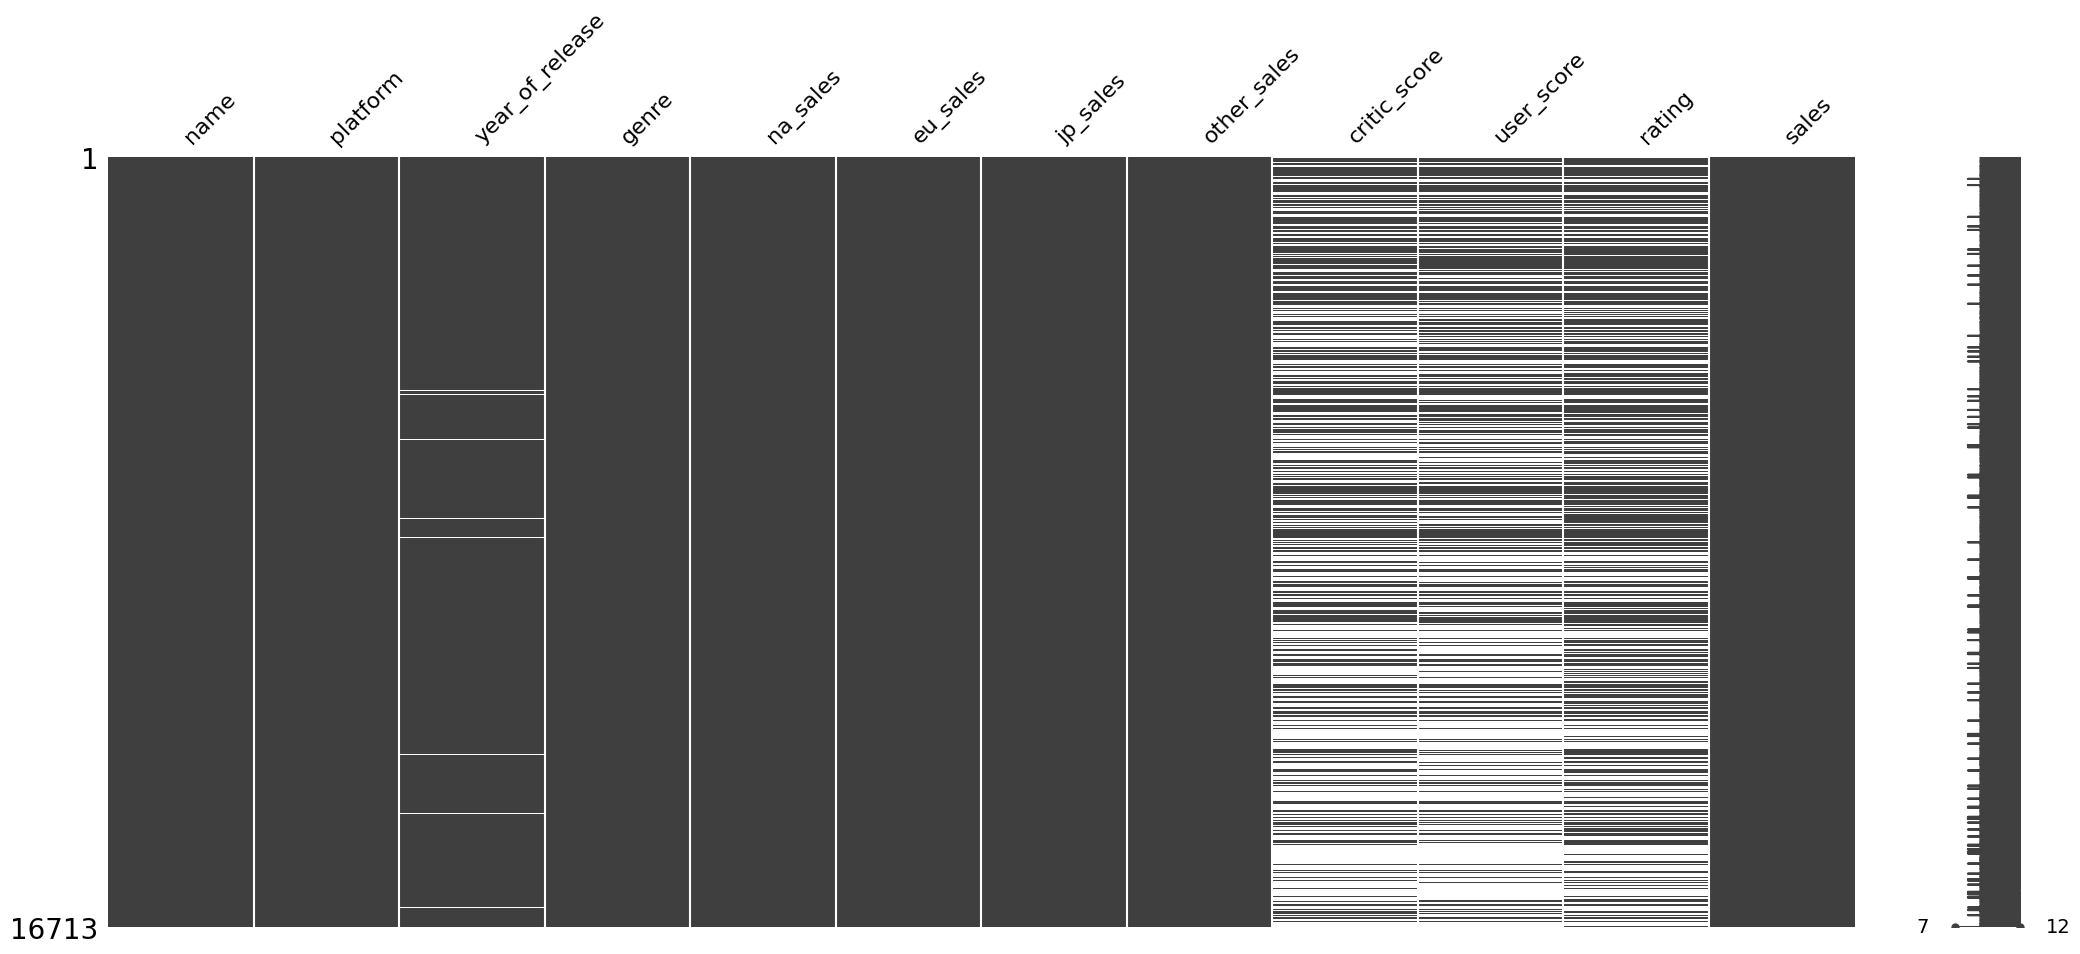

In [13]:
msno.matrix(games)

pd.DataFrame({
    'Кол-во пропусков': games.isna().sum().sort_values(ascending=False),
    '% пропущенных': games.isna().mean().sort_values(ascending=False) * 100,
}).style.background_gradient('coolwarm').format({'% пропущенных': '{:.2f}'})

В датасете много пропусков, однако видно, что некоторую часть заполнить точно можно.

- `year_of_release`, `genre`, `name`

Посмотрим на пропуски

In [14]:
games[games[['name', 'genre']].isna().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16712,None,GEN,1993.0,None,1.78,0.53,0.03,0.08,NaN,None,None,2.42


Игра не является статистически значимой, потому что она 1993 года (старая).

In [15]:
games = games[~games[['name', 'genre']].isna().any(axis=1)]
print(games.shape)

(16712, 12)


- `year_of_release`

Посмотрим на платформы игр, с пропущенными значениями в `year_of_release`

In [16]:
platform_with_year_missing = list(games.platform[games.year_of_release.isna()].unique())
print(platform_with_year_missing)

['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP', 'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV']


|Консоль|Год выпуска|
|-------|-----------|
|PC     |-          |
|PS2    |2000       |
|Wii    |2006       |
|X360   |2005       |
|DS     |2004       |
|PS3    |2006       |
|XB     |2001       |
|2600   |1977       |
|PSP    |2004       |
|GC     |2001       |
|GBA    |2001       |
|3DS    |2011       |
|PS     |1994       |
|N64    |1996       |
|GB     |1989       |
|PSV    |2011       |

Все эти консоли, кроме 3DS и PSV, являются сильно старыми, можно удалить игры с пропусками в `year_of_release` на этих платформах

In [17]:
games = games.query('~year_of_release.isna() or (year_of_release.isna() and platform in ["3DS", "PSV", "PC"])')
games[games.year_of_release.isna()].shape

(26, 12)

Для оставшихся пропущенных значений в столбце `year_of_release` установим среднее значение `year_of_release` среди игр выпустившихся на платформе данной игры.

In [18]:
games.year_of_release = games.groupby('platform').year_of_release.transform(lambda x: x.fillna(int(x.median())))

- `rating`

Значение по умолчанию: "Unknown"

In [19]:
games.rating = games.rating.fillna('Unknown')

На этом закончим, потому что оставшихся пропущенных значений слишком много и заполнять по типу медианной или средним будет невалидно.

_____
### <a id='toc1_4_5_'></a>[Приведение типов данных](#toc0_)

In [20]:
games.dtypes
games = games.astype({
	'user_score': 'float64',
	'critic_score': 'float64',
	'year_of_release': 'uint16',
})
display(games.dtypes)

name                object
platform            object
year_of_release     uint16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
sales              float64
dtype: object

_____
### <a id='toc1_4_6_'></a>[Обработка аномальных значений](#toc0_)

In [21]:
fig = make_subplots(rows=3, cols=3, subplot_titles=games.select_dtypes(include=['number']).columns)

for i, column in enumerate(games.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=games[column], name=column,),
        row=(i // 3) + 1, col=(i % 3) + 1
    )
fig.update_layout(height=1500, width=1200, showlegend=False)

Хоть математически в данных присутствуют выбросы, мы не будем их удалять, потому что эти игры-выбросы очень статистически значемые значения.

_____
### <a id='toc1_4_7_'></a>[Вывод:](#toc0_)

<Axes: >

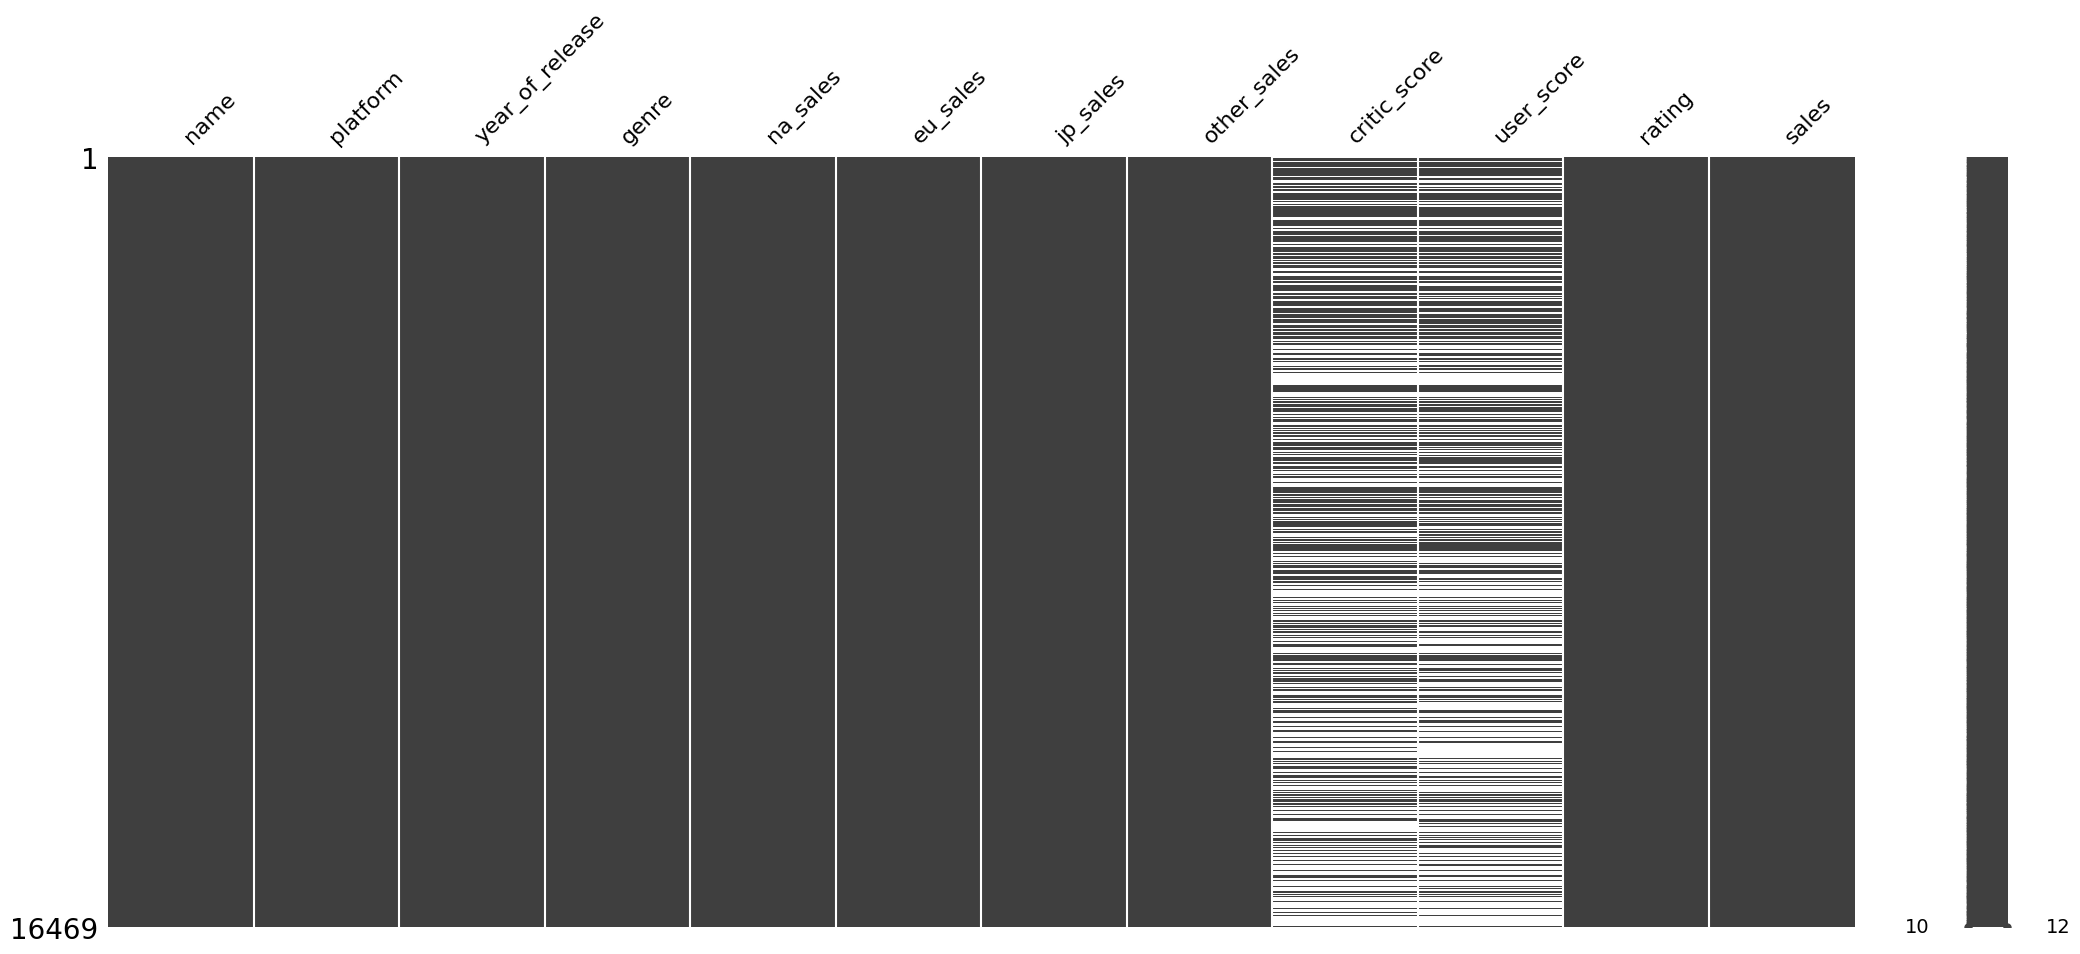

In [22]:
msno.matrix(games)

- Переимновал столбцы на корректные (таблица с колонками ниже)
- Создал новую колонку с общими продажами
- Нормировал `critic_score`
- Обработал пропущенные значения, но некоторые остались (матрица пропусков выше) 
- Привел колонки к корректным типам данных
- Аномальные значения не были выявлены

|Поле           |Тип данных|Описание                                             |
|---------------|----------|-----------------------------------------------------|
|name           |str       |Название игры                                        |
|platform       |str       |Платформа                                            |
|year_of_release|uint16    |Год выпуска                                          |
|genre          |str       |Жанр игры                                            |
|na_sales       |float     |Продажи в Северной Америке (миллионы проданных копий)|
|eu_sales       |float     |Продажи в Европе (миллионы проданных копий)          |
|jp_sales       |float     |Продажи в Японии (миллионы проданных копий)          |
|other_sales    |float     |Продажи в других странах (миллионы проданных копий)  |
|critic_score   |float     |Оценка критиков (максимум 100)                       |
|user_score     |float     |Оценка пользователей (максимум 10)                   |
|rating         |str       |Возрастная категория                                 |
|sales          |float     |Продажи во всем мире (миллионы проданных копий)      |

_____
_____
## <a id='toc1_5_'></a>[Исследовательский анализ данных](#toc0_)

_____
### <a id='toc1_5_1_'></a>[Функции отрисовок статистических графиков](#toc0_)

In [23]:
def barh(series, title, yaxis_title, xaxis_title='Продажи'):
	go.Figure(go.Bar(
		x=series.values,
		y=series.index,
		orientation='h',
		textposition='outside',
		text=series.values.round(1),
	)).update_layout(
		title=title,
		xaxis_title=xaxis_title,
		yaxis_title=yaxis_title,
		height=800,
		width=1200
	).show()


def feature_sales_dist_through_years(feature_values, feature_sales_dist, title_text):
	fig = go.Figure()
	for feature_value in feature_values:
		fig.add_trace(
			go.Scatter(
				x=feature_sales_dist[feature_value].index,
				y=feature_sales_dist[feature_value],
				marker=dict(symbol='circle'),
				name=feature_value,
			)
		)
	fig.update_xaxes(title_text='Год', dtick=1)
	fig.update_yaxes(title_text='Продажи')

	fig.update_layout(
		title_text=title_text,
		width=800,
		height=500,
		showlegend=True,
	)
	fig.show()


def statistical_graphis_for_categorical(data, hist_title, agg='val_count', top_n_in_pie=5):
    fig = make_subplots(
        rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]],
        subplot_titles=('Гистограмма', 'Круговая диаграмма')
    )

    if agg == 'val_count':
        category_agg = data.value_counts()
    elif agg == 'sum':
        category_agg = data.sum()
    else:
        raise ValueError('agg="val_count"|sum')
    categories = category_agg.index
    val_agg = category_agg.values

    fig.add_trace(
        go.Bar(
            x=val_agg, y=categories, 
            orientation='h',
            marker_color='green', 
			showlegend=False, 
			name='',
            width=0.8
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text='Частота' if agg == 'val_count' else 'Сумма', row=1, col=1)
    fig.update_yaxes(title_text=hist_title, tickvals=categories, row=1, col=1)

    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + ['Остальные'],
               values=category_agg.head(top_n_in_pie).values.tolist() + [category_agg[top_n_in_pie:].sum()],
               name='',
               textinfo='label+percent'),
        row=1, col=2
    )

    fig.update_layout(
        title_text=f'Статистические графики по колонке {hist_title}',
        showlegend=True,
        width=1000,
        height=600,
    )

    fig.show()


def statistical_graphis_for_numeric(col: pd.Series, xaxis_title, nbinsx=50):
	fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма', 'Диаграмма размаха'))

	fig.add_trace(
		go.Histogram(x=col, nbinsx=nbinsx, marker_color='blue', name=''),
		row=1, col=1
	)
	fig.update_xaxes(title_text=xaxis_title, row=1, col=1)
	fig.update_yaxes(title_text='Частота', row=1, col=1)

	fig.add_trace(
		go.Box(y=col, marker_color='orange', name=''),
		row=1, col=2
	)
	fig.update_yaxes(title_text=xaxis_title, row=1, col=2)

	fig.update_layout(
		title_text=f'Статистические графики по значению {xaxis_title}',
		showlegend=False,
		width=1000,
		height=500
	)

	fig.show()


def box_sales(games, feature, feature_name, range_cropped=None, only_first=None, height=1000, width=1000):
	fig = go.Figure()
	if not only_first:
		only_first = len(games[feature].unique())
	for feature_val in games[feature].unique():
		fig.add_trace(go.Box(
			y=games.query(f'{feature} == @feature_val').sales,
			name=feature_val,
			visible=bool(only_first) if only_first else 'legendonly' 
		))
		if only_first:
			only_first -= 1

	fig.update_yaxes(
		title_text='продажи'
	).update_layout(
		title_text=f'Диаграмма размаха продажи по каждому значению {feature_name}',
		height=height,
		width=width,
		updatemenus=[{
			'buttons': [{'args': [{'yaxis.autorange': True}],
						 'label': 'Полный',
						 'method': 'relayout'},
						{'args': [{'yaxis.range': range_cropped}],
						'label': 'Обрезанный',
						'method': 'relayout'},
						],
			'direction': 'down',
			'showactive': True,
			'x': 1.02,
			'y': 1.05,
			'xanchor': 'left',
			'yanchor': 'top'
		}] if range_cropped else None
	).show()

_____
### <a id='toc1_5_2_'></a>[Количество игр, выпущенных в разные годы.](#toc0_)

In [24]:
statistical_graphis_for_categorical(games.year_of_release, hist_title='год релиза игры', top_n_in_pie=5)

In [25]:
barh(games.groupby('year_of_release').name.count().sort_values(),
     title='Количесвто игр, выпущенных в каждом году',
     yaxis_title='год релиза игры',
     xaxis_title='Частота')

Все года в итоговой выборке не будут полезны, потому что игры становятся технически "тяжелее" и уровень продаж меняется, поэтому старые игры станут статистических "баластом".

_____
### <a id='toc1_5_3_'></a>[Продажи каждой платформы.](#toc0_)

In [26]:
platform_sales = games.groupby('platform').sales.sum().sort_values()
barh(platform_sales, yaxis_title='Платформа', title='Продажи игр на платформах')

Выберем топ 10 самых популярных платформ

In [27]:
pop_platform_sales = platform_sales.tail(10)
barh(pop_platform_sales, yaxis_title='Платформа', title='Продажи игр на платформах')

In [28]:
pop_platform = pop_platform_sales.index
pop_platform_dist_years = games.query('platform in @pop_platform').groupby(by=['platform', 'year_of_release']).sales.sum()
feature_sales_dist_through_years(pop_platform, pop_platform_dist_years, title_text='Распределение продаж игр по годам для популярных платформ')

Дата выхода консоли DS - 2004, поэтому игра, которая была выпущенна на консоли DS в 1985 (самая левая точка графика) - однозначно выброс. Уберем ее.

In [29]:
games = games.query('platform != "DS" or (platform == "DS" and year_of_release != 1985)')
pop_platform_dist_years = pop_platform_dist_years.drop(('DS', 1985))
feature_sales_dist_through_years(pop_platform, pop_platform_dist_years, title_text='Распределение продаж игр по годам для популярных платформ')

- Каждые платформа имеет хорошую статистику в среднем 7 лет. 
- Так как мы планируем компанию на 2017 год, то далее будем рассматривать временной промежуток с 2014 до 2016.
- Стоит отметить что каждая консоль имеет сперва высходящий, а потом нисходящий тренд по двум факторам: 
	- Консоль набирает популярность, ее покупают, а потом продажи консолей уменьшается из-за того, что большиство желающих купили и консоль впринципе со временем становится неактуальной
	- Аналогично с играми
- То что продажи игр к 2016 всех актуальных консолей падают, не означает что игры теряют популярность, а то что данные конкретно за 2016 год неполные.

_____
### <a id='toc1_5_4_'></a>[Актуальный период для прогноза на 2017 год.](#toc0_)

In [30]:
games = games.query('year_of_release > 2013')
games.shape

(1690, 12)

Посмотрим сколько игр получилось на каждой платформе.

In [31]:
games.platform.value_counts()

platform
PS4     376
PSV     296
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: count, dtype: int64

У платформ PS2, Wii, DS и PSP из-за фильтрации по `year_of_release` осталось слишком мало значений, что делает эту плафторму невалидной для анализа.

In [32]:
games = games.query('~platform.isin(["PS2", "DS", "Wii", "PSP"])')

In [33]:
platform_sales_actual_years = games.groupby('platform').sales.sum().sort_values()
barh(platform_sales_actual_years, yaxis_title='Платформа', title='Продажи игр на платформах за акутальный период')

- Лидерами продаж за период 2013-2016 являются PS4, PS3, XOne и 3DS

In [34]:
pop_platform_actual_years = platform_sales_actual_years.index
pop_platform_dist_actual_years = games.query('platform in @ pop_platform_actual_years').groupby(by=['platform', 'year_of_release']).sales.sum()
feature_sales_dist_through_years(pop_platform_actual_years, pop_platform_dist_actual_years, title_text='Распределение продаж игр по актуальным годам для популярных платформ',)

- Ведущие позиции на рынке на момент 2016 держат такие платформы как PS4 и XOne. Это самые новые консоли, соотвественно игровая индустрия нацелена на релиз на этих платформах.
- Хоть у 3DS продажи не такие большие как у PS4 и XOne, но это все также актуальная платформа.
- Остальные консоли старые, однако также держат уровень популярности.
- Как видно на примере новых консолей, с их покупкой пользователи покупают игры, а через какое-то время после релиза, потребности в этом становится меньше, потому что игры на платформы выпускаются не так часто.
- А старые платформы имеют нисходящий тренд, наверное из-за того, что они не могут поддерживать новые игры.
- Также стоит учитывать PC устройства, потому что 30-летняя история игр на них дает о себе знать до сих пор.

_____
### <a id='toc1_5_5_'></a>[Диаграмма размаха sales по каждой платформе](#toc0_)

In [35]:
box_sales(games, 'platform', 'платформы', only_first=5, range_cropped=[0, 0.75])

Справа от графика есть легенды, нажав на них можно добавить/убрать диаграммы размаха каждой платформы, это помогает более детально сравнивать их. Также там расположена кнопка сокращая диапазон рассматриваемых значений sales.

- Каждая диаграмма показывает уникальные статистические характеристики, отражая свою популярность и успех на рынке.
- Также практически каждый бокс имеет выбросы, однако удалять их является ошибкой, потому что эти выбросы отражают очень удачные продажи игры на платформе, что имеет большую статистическую значимость.
- Сравнивая кол-во и значение выбросов, можно сказать, что самые успешные игры были выпущены на PS3

_____
### <a id='toc1_5_6_'></a>[Влияние отзывов пользователей и критиков на продажи игр относительно каждой платформы](#toc0_)

In [36]:
platforms = games.platform.unique()
fig = make_subplots(rows=len(platforms), cols=2,
					subplot_titles=np.array([[platform, platform] for platform in platforms]).flatten())
row = 1

for platform in platforms:
	platform_games = games.query('platform == @platform')[['sales', 'critic_score', 'user_score', 'platform']].dropna()
	fig.add_trace(go.Scatter(x=platform_games.critic_score,
							 y=platform_games.sales,
							 mode='markers',
							 marker=dict(size=7, opacity=0.3),
							 name=''),
				  row=row, col=1)
	slope, intercept = np.polyfit(platform_games.critic_score, platform_games.sales, 1)
	regression_line = slope * platform_games.critic_score + intercept
	fig.add_trace(go.Scatter(x=platform_games.critic_score,
							 y=regression_line,
							 mode='lines',
							 line=dict(color='black'),
							 name=''),
				  row=row, col=1)
	fig.update_xaxes(title_text='Оценка критиков', row=row, col=1).update_yaxes(title_text='Продажи', row=row, col=1)
	fig['layout']['annotations'][(row-1)*2]['text'] += f' (corr = {slope:.3f}))'

	fig.add_trace(go.Scatter(x=platform_games.user_score,
							 y=platform_games.sales,
							 mode='markers',
							 marker=dict(size=7, opacity=0.3),
							 name=''),
				  row=row, col=2)
	slope, intercept = np.polyfit(platform_games.user_score, platform_games.sales, 1)
	regression_line = slope * platform_games.user_score + intercept
	fig.add_trace(go.Scatter(x=platform_games.user_score,
							 y=regression_line,
							 mode='lines',
							 line=dict(color='black'),
							 name=''),
				  row=row, col=2)
	fig.update_xaxes(title_text='Оценка пользователей', row=row, col=2).update_yaxes(title_text='Продажи', row=row, col=2)
	fig['layout']['annotations'][(row-1)*2+1]['text'] += f' (corr = {slope:.3f}))'
		
	row += 1

fig.update_layout(
	title_text='Диаграммы рассеивания для определения зависимости sales от critic_score и user_score',
	width=900,
	height=5000,
	showlegend=False,
)
fig.show()

- Корреляция взависимости от платформы и оценок (critic/user) сильно варьируется.
- `critic_score` на актуальных платформах показывает положительные умеренные корреляции, это указавает на то, что высокие оценки критиков увеличивают продажи и наоборот. Но есть и слабые значения корреляции, преимущественно на неактуальных платформах.
- Корреляция между `user_score` и `sales` по каждой платформе значительно меньше, кроме платформы WiiU (она там умеренная). Вообщем зависимость слабая или отсутствует.
- Однако судить о таких зависимостях некорректно из-за ограниченности в данных.

_____
### <a id='toc1_5_7_'></a>[Распределения игр по жанрам](#toc0_)

In [38]:
statistical_graphis_for_categorical(games.genre, top_n_in_pie=6, hist_title='жанр')

Больше всего игр жанра Action, Role-Playing, Adventure

In [137]:
genre_sales = games.groupby('genre').sales.sum().sort_values()
pop_genre_dist_years = games.query('genre in @games.genre.unique()').groupby(by=['genre', 'year_of_release']).sales.sum()
feature_sales_dist_through_years(games.genre.unique(), pop_genre_dist_years, f'Распределение продаж игр по годам по каждому жанру')

Игры жанра Shooter и Sports имееют высходящий тренд последние годы, а ранее самый популярный Action, нисходящий. Также можно заметить в 2016 году Shooter обогнали Action.

In [40]:
box_sales(games, 'genre', 'жанра', range_cropped=[0, 1.8], width=1200, only_first=6)

- Хоть самый большой разброс значений `sales` у жанра Action, в среднем самым прибыльным является жанр Shooter
- Менее прибыльными можно считать жанры медиана которых меньше 0.5 (Adventure и Puzzle)

_____
### <a id='toc1_5_8_'></a>[Вывод](#toc0_)

- Однако старые игры (до 2010 года) могут искажать современную картину, поскольку тенденции и уровень продаж меняются со временем.
- Лидерами по продажам игр являются такие платформы, как PS3, X360, PS4 и 3DS.
- Каждая платформа имеет "жизненный цикл", который длится примерно 5 лет, где наблюдается сначала рост, а затем спад продаж.
- В 2016 году на рынке преобладают новые консоли, такие как PS4 и XOne.
- Выбросы не следует удалять, так как они статистически самые важные объекты.
- Зависимость продаж игр от оценок критиков на популярных платформах (PS4, XOne) умеренно положительная. На менее актуальных консолях эта связь либо слабая.
- Оценки пользователей (user_score) слабо коррелируют с продажами на большинстве платформ.
- Жанры с высокими продажами, такие как Action и Shooter занимают большую долю рынка.

_____
_____
## <a id='toc1_6_'></a>[Портрет пользователя каждого региона](#toc0_)

_____
### <a id='toc1_6_1_'></a>[Суммарные продажи по регионам](#toc0_)

In [139]:
data = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
data.name = 'region sales'
statistical_graphis_for_categorical(data, hist_title='продажи в регионы', agg='sum',)

_____
### <a id='toc1_6_2_'></a>[Самые популярные платформы и жанры и влияние рейтинга ESRB на продажи в разных регионах](#toc0_)

- Рейтинг ESRB

In [140]:
games.rating.unique()

array(['Unknown', 'M', 'E', 'T', 'E10+'], dtype=object)


1. «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
2. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
3. «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
4. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

_____
### <a id='toc1_6_3_'></a>[Портер пользователя в каждом городе](#toc0_)

In [141]:
translate = {
    'na_sales': 'Северной Америке',
    'jp_sales': 'Японии',
    'eu_sales': 'Европе',
}

In [142]:
pull = [0.1 if i == 0 else 0 for i in range(6)]
highlighting_color = ['gold' if i == 0 else 'white' for i in range(6)]
highlighting_width = [4 if i == 0 else 1 for i in range(6)]
marker = dict(line=dict(color=highlighting_color, width=highlighting_width))

for region_sales_col in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platforms = games.groupby('platform')[region_sales_col].sum().sort_values(ascending=False).head(5)
    top5_genres = games.groupby('genre')[region_sales_col].sum().sort_values(ascending=False).head(5)
    sales_by_rating_through_region = games.groupby('rating')[region_sales_col].sum().sort_values(ascending=False).head(5)

    other_platforms_sum = games.groupby('platform')[region_sales_col].sum().sum() - top5_platforms.sum()
    other_genres_sum = games.groupby('genre')[region_sales_col].sum().sum() - top5_genres.sum()
    other_ratings_sum = games.groupby('rating')[region_sales_col].sum().sum() - sales_by_rating_through_region.sum()

    fig = make_subplots(subplot_titles=[f'Топ 5 платформ', f'Топ 5 жанров', f'Продажи относительно рейтинга'],
                        specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
                        rows=1, cols=3)
    
    # Платформы
    fig.add_trace(go.Pie(labels=top5_platforms.index.tolist() + ['Другие'],
                         values=top5_platforms.values.tolist() + [other_platforms_sum],
                         text=top5_platforms.index.tolist() + ['Другие'],
                         pull=pull,
                         name='',
                         marker=marker),
                  row=1, col=1)

    # Жанры
    fig.add_trace(go.Pie(labels=top5_genres.index.tolist() + ['Другие'],
                         values=top5_genres.values.tolist() + [other_genres_sum],
                         text=top5_genres.index.tolist() + ['Другие'],
                         pull=pull,
                         name='',
                         marker=marker),
                  row=1, col=2)

    # Рейтинги
    fig.add_trace(go.Pie(labels=sales_by_rating_through_region.index.tolist() + ['Другие'],
                         values=sales_by_rating_through_region.values.tolist() + [other_ratings_sum],
                         text=sales_by_rating_through_region.index.tolist() + ['Другие'],
                         pull=pull,
                         name='',
                         marker=marker),
                  row=1, col=3)

    fig.update_layout(title_text=f'Топ-5 платформ и жанров и влияние рейтинга на продажи в {translate[region_sales_col]}',
                      width=1000, height=500)
    fig.show()


_____
### <a id='toc1_6_4_'></a>[Вывод:](#toc0_)

Портреты пользователей из разных регионов:
- Северная Америка:
	- Платформа: PS4
	- Жанр: Action
	- ESRB: M (для взрослых)
- Европа:
	- Платформа: PS4
	- Жанр: Action
	- ESRB: M (для взрослых)
- Япония:
	- Платформа: 3DS
	- Жанр: Role-Playing
	- ESRB: ? (из-за большого кол-ва пропусков)

_____
_____
## <a id='toc1_7_'></a>[Проверка гипотез](#toc0_)

_____
### <a id='toc1_7_1_'></a>[Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#toc0_)

- H₀ = Средние пользовательские рейтинги платформ Xbox One и PC равны
- H₁ = Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [143]:
user_score_of_XOne = games.query('platform == "XOne" and ~user_score.isna()').user_score
user_score_of_PC = games.query('platform == "PC" and ~user_score.isna()').user_score
print('Дисперсия user_score на платформе XOne:',  np.var(user_score_of_XOne))
print('Дисперсия user_score на платформе PC:',  np.var(user_score_of_PC))

Дисперсия user_score на платформе XOne: 1.8795460055096425
Дисперсия user_score на платформе PC: 2.8773743617307175


Дисперссии сильно отличаются, поэтому установим параметр `equal_var=False`

In [144]:
alpha = .05
pvalue = st.ttest_ind(user_score_of_XOne, user_score_of_PC, equal_var=False).pvalue
print(f'pvalue = {pvalue:.4f}')
if pvalue < alpha:
    print('Гипотеза H₀ опровергнута')
else:
    print('Нет оснований опровергать H₀')

pvalue = 0.1160
Нет оснований опровергать H₀


In [145]:
statistical_graphis_for_numeric(user_score_of_XOne, xaxis_title='оценка пользователей на игры платформы "XOne"', nbinsx=10)

In [146]:
statistical_graphis_for_numeric(user_score_of_PC, xaxis_title='оценка критиков на игры платформы "PC"', nbinsx=10)

Медианны этих значений совпадают, а так же значения Q1 и Q3 отличаются на 0.1 и 0.5 соответственно

***Нет оснований опровергать H₀.***

_____
### <a id='toc1_7_2_'></a>[Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#toc0_)

- H₀ = Средние пользовательские рейтинги жанров Action и Sports равны
- H₁ = Средние пользовательские рейтинги жанров Action и Sports не равны

In [147]:
user_score_of_Action = games.query('genre == "Action" and ~user_score.isna()').user_score
user_score_of_Sports = games.query('genre == "Sports" and ~user_score.isna()').user_score
print('Дисперсия user_score по жанру Action:',  np.var(user_score_of_Action))
print('Дисперсия user_score по жанру Sports:',  np.var(user_score_of_Sports))

Дисперсия user_score по жанру Action: 1.89208448117539
Дисперсия user_score по жанру Sports: 3.440131645250693


Дисперссии сильно отличаются, поэтому установим параметр `equal_var=False`

In [148]:
alpha = .05
pvalue = st.ttest_ind(user_score_of_Action, user_score_of_Sports, equal_var=False).pvalue
print(f'pvalue = {pvalue}')
if pvalue < alpha:
    print('Гипотеза H₀ опровергнута')
else:
    print('Нет оснований опровергать H₀')

pvalue = 2.132579125573844e-14
Гипотеза H₀ опровергнута


Хоть математически гипотеза H₀ опровергнута, посмотрим на статистические графики этих значений

In [149]:
statistical_graphis_for_numeric(user_score_of_Action, xaxis_title='оценка пользователей на игры жанра "Action"', nbinsx=10)

In [150]:
statistical_graphis_for_numeric(user_score_of_Sports, xaxis_title='оценка пользователей на игры жанра "Sports"', nbinsx=10)

Медианны этих значений различаются на 1.5, а так же значения Q1 и Q3 отличаются на 2.2 и 1.3 соответственно

***Гипотеза H₀ опровергнута***

_____
### <a id='toc1_7_3_'></a>[Вывод](#toc0_)

- Для проверки гипотез был выбран метод `scipy.stats.ttest_ind`, потому что:
	1. Выборки разного размера из одной генеральной совокупности.
	2. Выборки это не значения одной совокупности до и после изменения.
	3. Обе гипотезы доказаны.


- Средние пользовательские рейтинги платформ Xbox One и PC:
	
	По результатам теста статистической значимости, нет оснований отвергать нулевую гипотезу (H₀), что средние пользовательские рейтинги на платформах Xbox One и PC одинаковы. Статистически значимых различий между ними не выявлено. Это подтверждается сравнительным анализом медиан и квартилей.


- Средние пользовательские рейтинги жанров Action и Sports:

	В ходе анализа данных было выявлено, что гипотеза H₀ опровергнута — средние пользовательские рейтинги жанров Action и Sports различаются. Это также подтверждается значительной разницей между медианами и квартилями.

_____
_____
## <a id='toc1_8_'></a>[Общий вывод](#toc0_)

- Анализ показал, что:
	- Ведущими платформами являются PS4 и Xbox One, это объясняется их новизной и популярностью на рынке. Старые платформы, такие как PS3 и X360, показывают снижение продаж, что связано с их устареванием и ограниченной поддержкой новых игр.
	- Каждая игровая платформа имеет свой жизненный цикл, который длится около 5-7 лет.
	- Наиболее популярными жанрами игр за анализируемый период являются Action и Shooter. Жанр Shooter демонстрирует восходящий тренд по продажам, постепенно обгоняя Action, который начинает снижаться.
	- В Северной Америке и Европе самой популярной платформой является PS4, а жанром — Action. В Японии лидируют портативные консоли, в частности, 3DS, а также жанр Role-Playing. Это подчеркивает региональные различия в игровых предпочтениях.
	- Проведенные проверки гипотез показали, что средние пользовательские рейтинги Xbox One и PC схожи, а пользовательские DS игр жанров Action и Sports различаются.
- Советы бизнесу:
	- Акцентировать рекламную стратегию надо на новейшие консоли, такие как PS4 и Xbox One, так как они демонстрируют самые высокие продажи, а также стоит обратить внимание что год релиза консоли Nintendo Switch 2017 и на эту консоль будет много новых игр с другими платформенными взаимодейстивями (такие как съемные джойстики для игры вдвоем).
	- Стабильную популярность держит и скорее всего долгие году будут держать игры на персональных компьютерах, на них всегда стоит обращать внимание.
	- Несмотря на то, что 3DS теряет популярность, она все еще может приносить доход. Выпуск обновлений или поддержка существующих игр на этой платформах может продолжать генерировать стабильные продажи в нишевых сегментах.
	- Стратегии маркетинга игр должны учитывать региональные особенности. Например, в Японии стоит делать акцент на портативные консоли и жанр Role-Playing, в то время как в Северной Америке и Европе на консоли PS4, игры жанра Action и Shooter и игры нацеленные на взрослую аудиторию.